You should consider upgrading via the 'C:\Users\sojin\anaconda3\envs\Lecture2022_1_DataAnaly\python.exe -m pip install --upgrade pip' command.


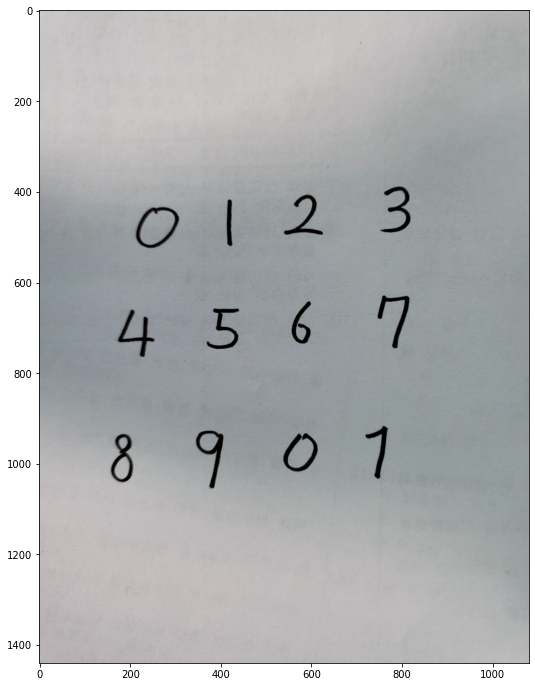

In [51]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("./300.jpg")

plt.figure(figsize=(15,12))
plt.imshow(img)

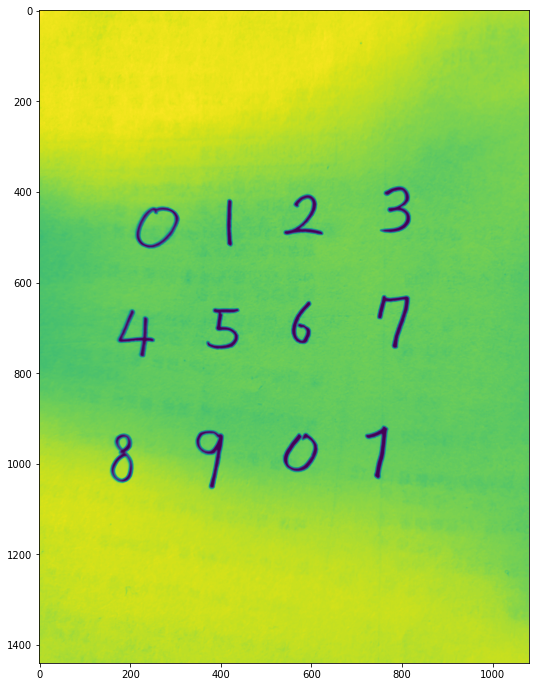

In [53]:
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
plt.figure(figsize=(15,12))
plt.imshow(img_blur);

In [54]:
ret, img_th = cv2.threshold(img_blur, 100, 230, cv2.THRESH_BINARY_INV)

contours, hierachy= cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = [cv2.boundingRect(each) for each in contours]
rects

[(159, 935, 48, 106),
 (538, 933, 77, 85),
 (346, 927, 61, 128),
 (719, 917, 50, 117),
 (174, 661, 81, 104),
 (369, 658, 72, 90),
 (556, 642, 44, 94),
 (746, 629, 71, 117),
 (213, 434, 96, 91),
 (414, 418, 12, 103),
 (540, 407, 86, 89),
 (753, 389, 66, 102)]

In [55]:
img_result = []
img_for_class = img.copy()

margin_pixel = 60

for rect in rects:
    #[y:y+h, x:x+w]
    img_result.append(
        img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel, 
                      rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel])
    
    # Draw the rectangles
    cv2.rectangle(img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 

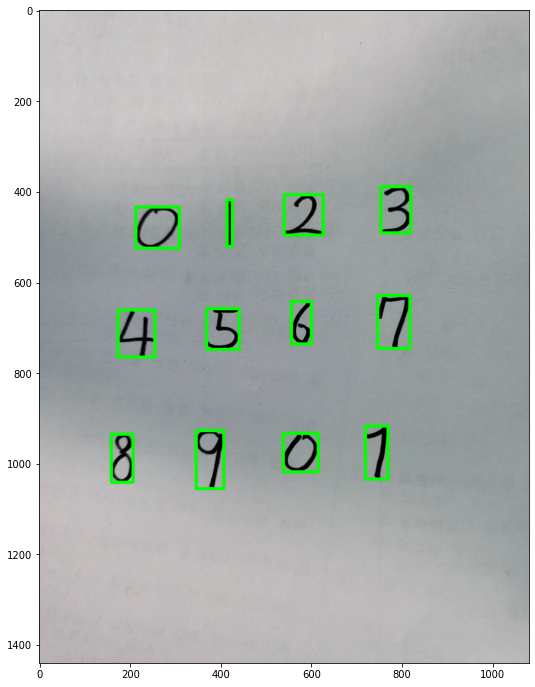

In [56]:
plt.figure(figsize=(15,12))
plt.imshow(img);

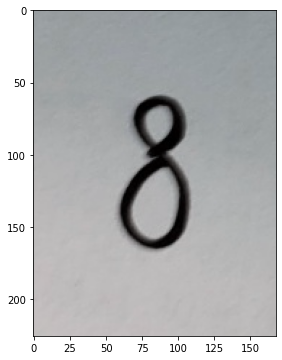

In [57]:
plt.figure(figsize=(8,6))
plt.imshow(img_result[0]);

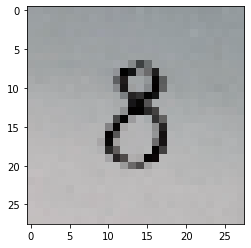

In [58]:
plt.figure(figsize=(4,4))
plt.imshow(cv2.resize(img_result[0], (28,28)));

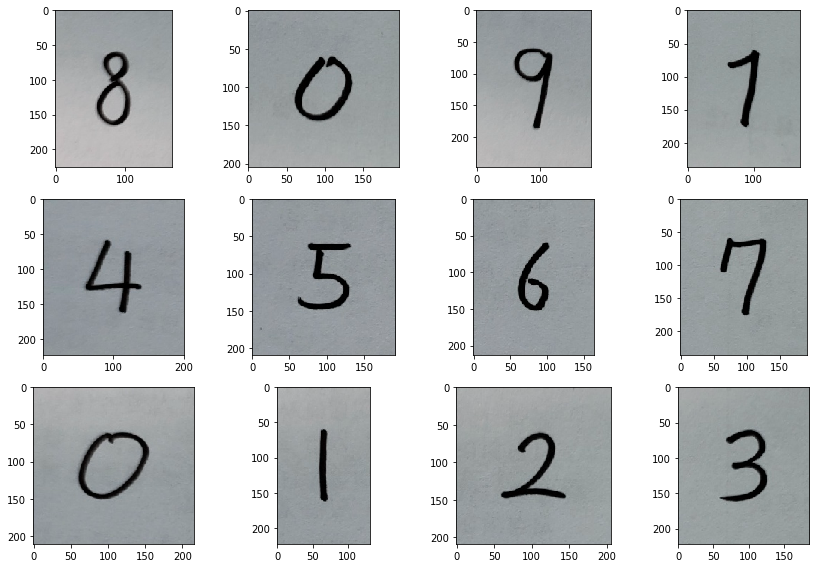

In [59]:
count = 0
nrows = 3
ncols = 4

plt.figure(figsize=(12,8))

for n in img_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(n, cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

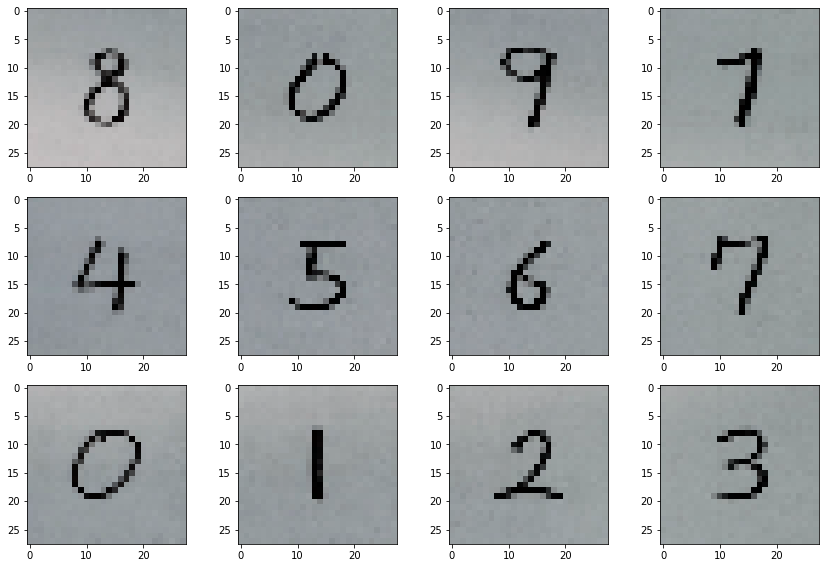

In [64]:
count = 0
nrows = 3
ncols = 4

plt.figure(figsize=(12,8))

for n in img_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(cv2.resize(n,(28,28)), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

In [65]:
## 작성자 : 이수진
## openCV를 활용한 이미지 처리 시도 